In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
kernel_sizes = [3, 5, 7, 9]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/images_CV"

In [ ]:
capybara = np.array(Image.open("/content/drive/MyDrive/images_CV/image1.jpg").convert("L"))
cat = np.array(Image.open("/content/drive/MyDrive/images_CV/image2.jpg").convert("L"))
aurora = np.array(Image.open("/content/drive/MyDrive/images_CV/image3.jpg").convert("L"))
clouds = np.array(Image.open("/content/drive/MyDrive/images_CV/image4.jpg").convert("L"))

In [ ]:
def box_filter(img, ksize):
  
    pad_size = ksize // 2
    
    padded_img = np.pad(img, (pad_size, pad_size), mode='edge')
    
    filtered_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded_img[i:i+ksize, j:j+ksize]
            pixel_sum = np.sum(neighborhood)
            pixel_avg = pixel_sum / (ksize * ksize)
            filtered_img[i, j] = pixel_avg
            
    return filtered_img

In [ ]:
def resize(img):
  plt.figure(figsize=(30, 10))
  plt.imshow(img, cmap="gray")

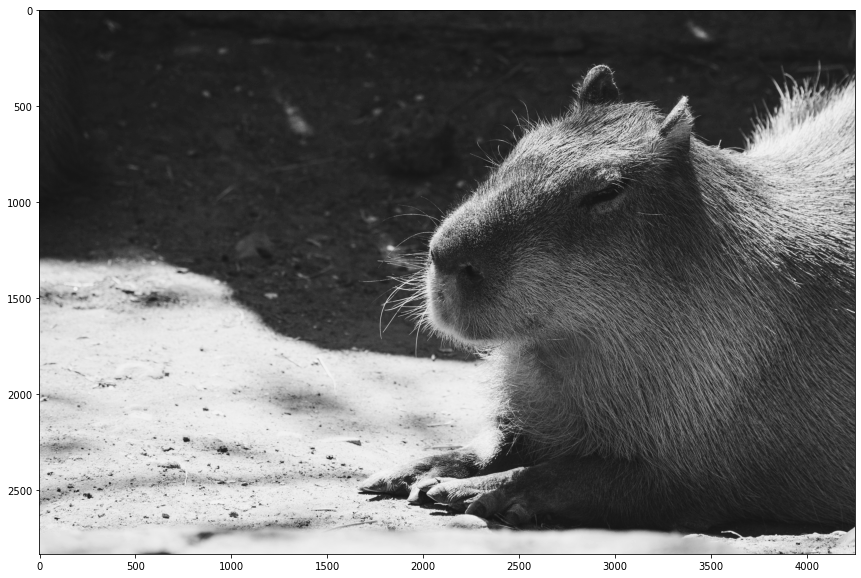

In [ ]:
resize(capybara)

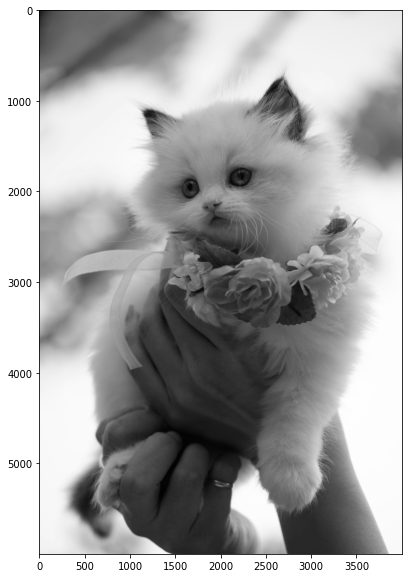

In [ ]:
resize(cat)

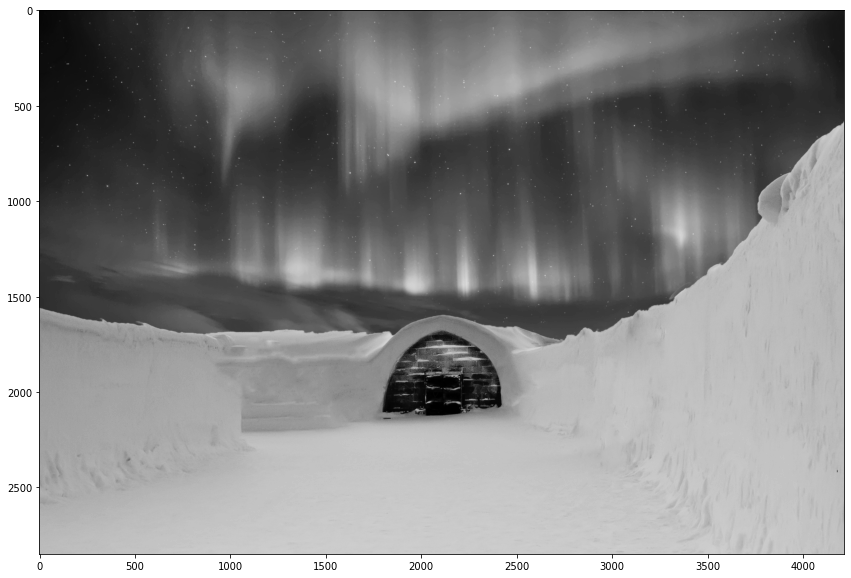

In [ ]:
resize(aurora)

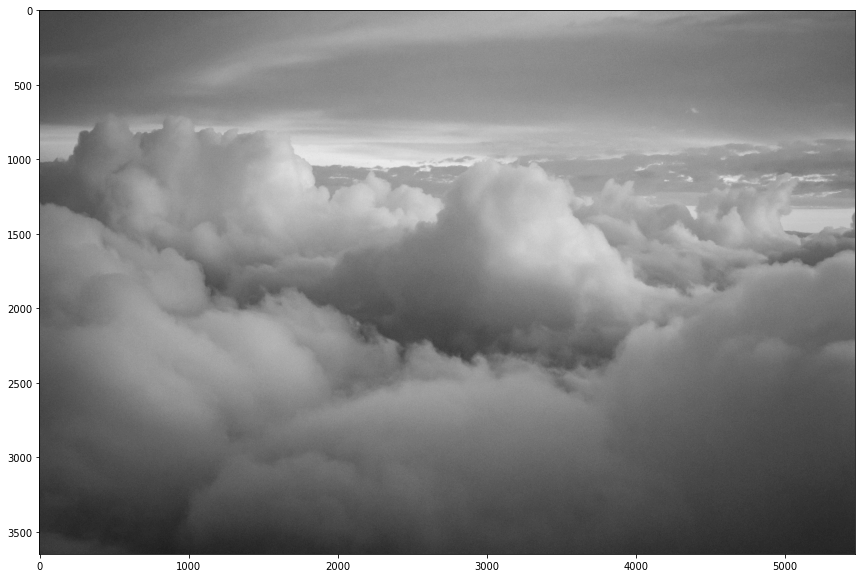

In [ ]:
resize(clouds)

In [ ]:
filtered_img1_list = [box_filter(capybara, kernel_size) for kernel_size in kernel_sizes]
filtered_img2_list = [box_filter(cat, kernel_size) for kernel_size in kernel_sizes]
filtered_img3_list = [box_filter(aurora, kernel_size) for kernel_size in kernel_sizes]
filtered_img4_list = [box_filter(clouds, kernel_size) for kernel_size in kernel_sizes]

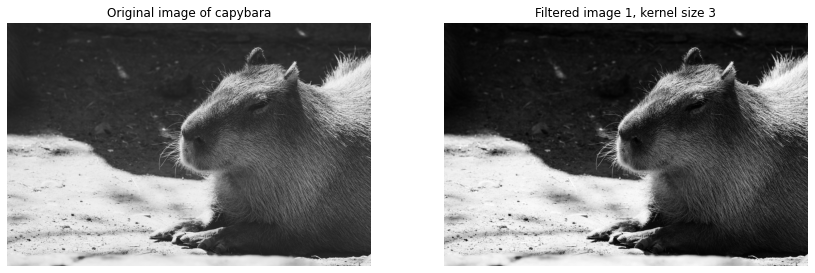

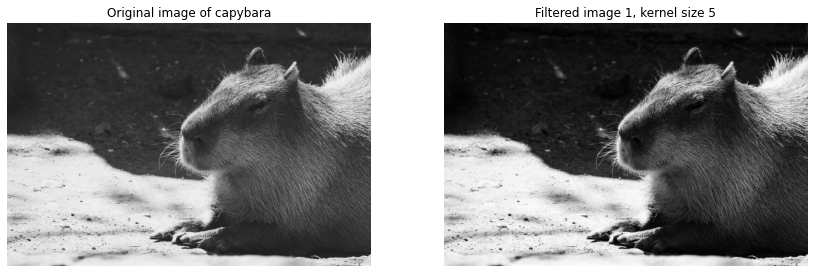

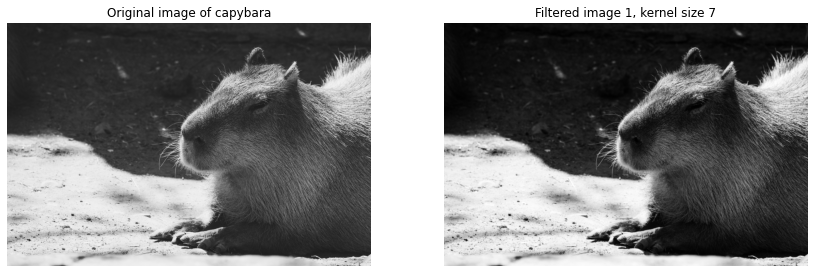

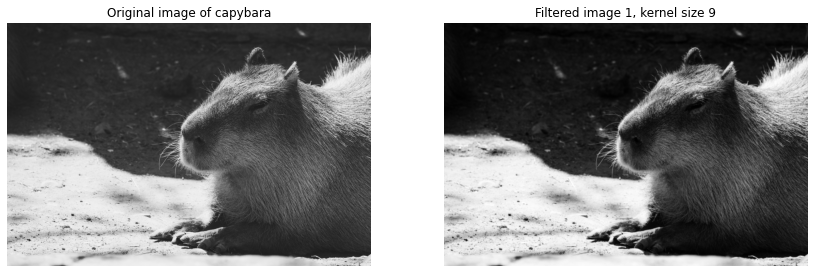

In [ ]:
for i, kernel_size in enumerate(kernel_sizes):
    plt.figure(figsize=(30, 10))
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(capybara, cv2.COLOR_BGR2RGB), cmap="gray")
    plt.title("Original image of capybara")
    plt.axis("off")
    plt.subplot(2, 4, 2)
    plt.imshow(filtered_img1_list[i], cmap="gray")
    plt.title(f"Filtered image 1, kernel size {kernel_size}")
    plt.axis("off")

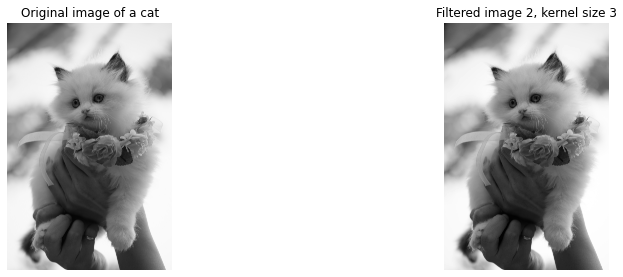

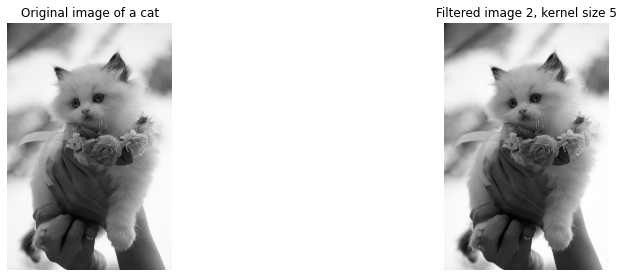

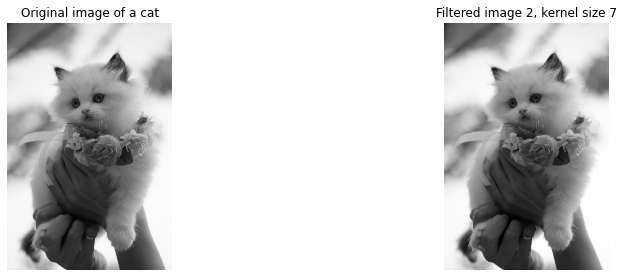

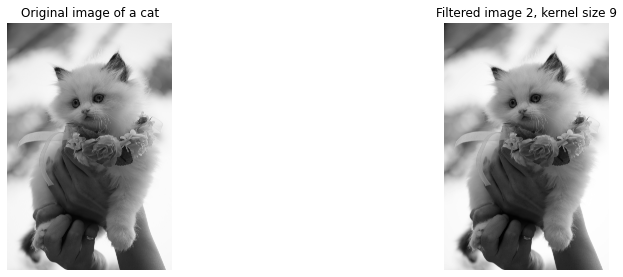

In [ ]:
for i, kernel_size in enumerate(kernel_sizes):
    plt.figure(figsize=(30, 10))
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB), cmap="gray")
    plt.title("Original image of a cat")
    plt.axis("off")
    plt.subplot(2, 4, 2)
    plt.imshow(filtered_img2_list[i], cmap="gray")
    plt.title(f"Filtered image 2, kernel size {kernel_size}")
    plt.axis("off")

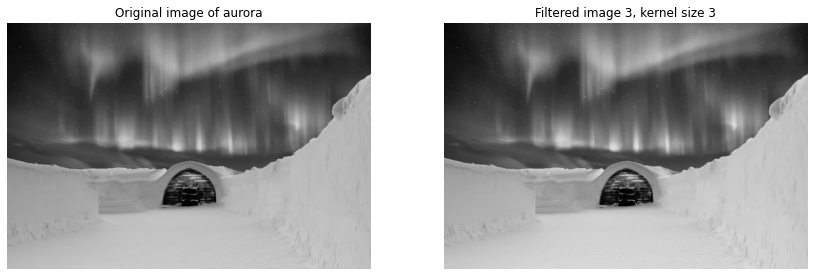

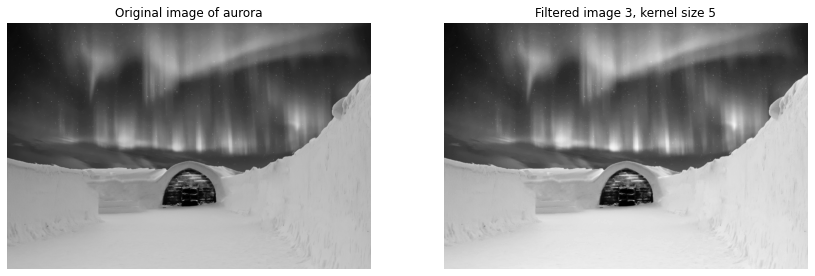

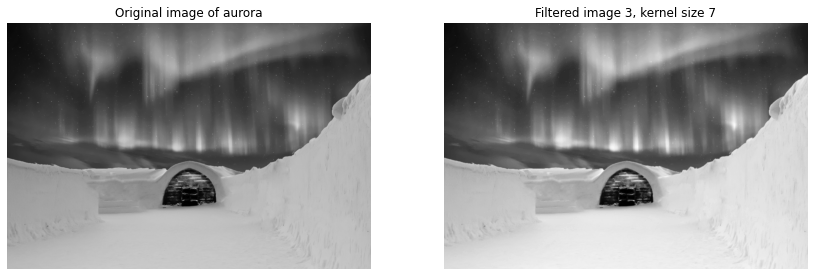

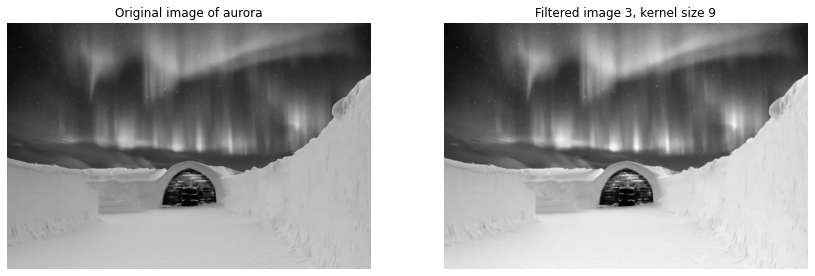

In [ ]:
for i, kernel_size in enumerate(kernel_sizes):
    plt.figure(figsize=(30, 10))
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(aurora, cv2.COLOR_BGR2RGB), cmap="gray")
    plt.title("Original image of aurora")
    plt.axis("off")
    plt.subplot(2, 4, 2)
    plt.imshow(filtered_img3_list[i], cmap="gray")
    plt.title(f"Filtered image 3, kernel size {kernel_size}")
    plt.axis("off")

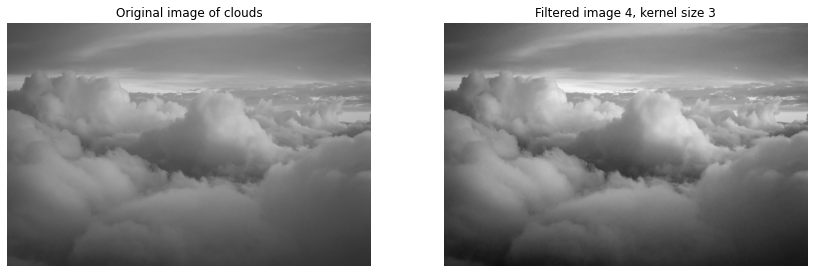

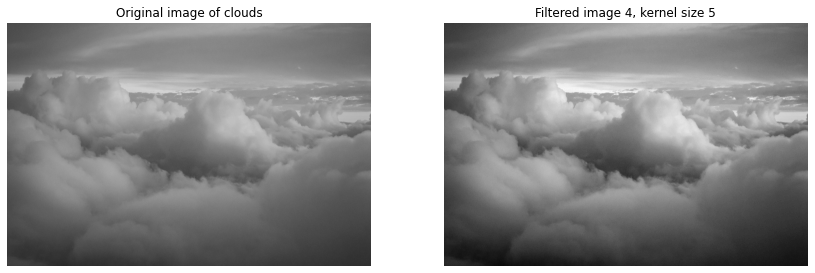

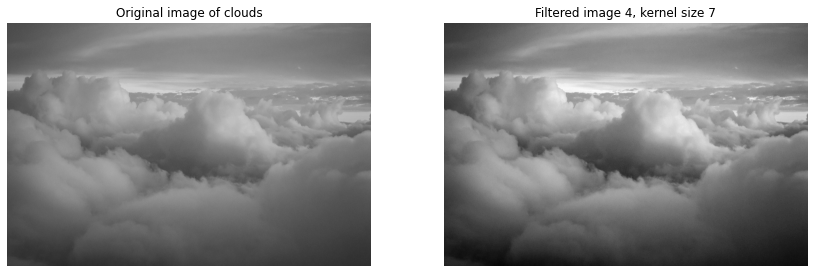

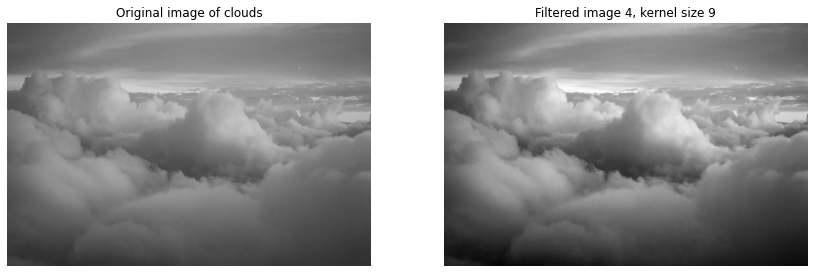

In [ ]:
for i, kernel_size in enumerate(kernel_sizes):
    plt.figure(figsize=(30, 10))
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(clouds, cv2.COLOR_BGR2RGB), cmap="gray")
    plt.title("Original image of clouds")
    plt.axis("off")
    plt.subplot(2, 4, 2)
    plt.imshow(filtered_img4_list[i], cmap="gray")
    plt.title(f"Filtered image 4, kernel size {kernel_size}")
    plt.axis("off")

In [ ]:
def erosion(image):
    w = np.ones((10, 10), np.uint8)
    output = np.zeros_like(image)
    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            g = [w[0, 0] * image[x-1, y-1], w[0, 1] * image[x-1, y], w[0, 2] * image[x-1, y+1],
                 w[1, 0] * image[x, y-1], w[1, 1] * image[x, y], w[1, 2] * image[x, y+1],
                 w[2, 0] * image[x+1, y-1], w[2, 1] * image[x+1, y], w[2, 2] * image[x+1, y+1]]
            output[x, y] = min(g)
    return output

In [ ]:
img = cv2.imread('/content/drive/MyDrive/images_CV/babyloss.jpeg',0)


In [ ]:
kernel = [[0,1,0],[1,1,1],[0,1,0]]
kernel =np.array(kernel)

In [ ]:
eroded_img = erosion(img,kernel)

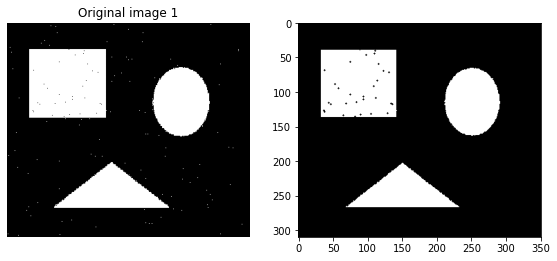

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image 1")
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(eroded_img, cmap="gray")